In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2

In [2]:
import os
print(os.listdir("C:/Users/chand/Desktop/major project/17810_23812_bundle_archive"))

['chest_xray']


In [3]:
DIR = os.listdir('C:/Users/chand/Desktop/major project/17810_23812_bundle_archive/chest_xray')
print(DIR)

['chest_xray', 'images', 'test', 'train', 'val', '__MACOSX']


In [4]:
train_folder = 'C:/Users/chand/Desktop/major project/17810_23812_bundle_archive/chest_xray/train'
test_folder = 'C:/Users/chand/Desktop/major project/17810_23812_bundle_archive/chest_xray/test'
val_folder = 'C:/Users/chand/Desktop/major project/17810_23812_bundle_archive/chest_xray/val'


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

In [6]:
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 50 # resize image
data = []
def get_data_train(data_dir):
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [7]:
train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)

<ipython-input-6-78ec5a29af5d>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


C:\Users\chand\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

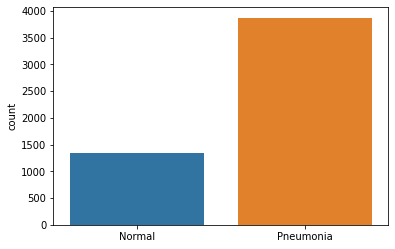

In [8]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")
        
sns.countplot(l)

In [9]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

## Noramalization

In [10]:
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

In [11]:
X_test.shape

(5840, 50, 50)

## reshape train, test and validation

In [12]:
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

In [13]:
X_test.shape

(5840, 50, 50, 1)

## Load important packages

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

## Training the Model

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation="relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), shuffle=True)
scores = model.evaluate(X_test, y_test)

#model.save("cnn.model")
model.save('model.h5')

Epoch 1/25
163/163 [==============================] - 22s 126ms/step - loss: 0.4683 - accuracy: 0.7823 - val_loss: 0.1909 - val_accuracy: 0.9267
Epoch 2/25
163/163 [==============================] - 18s 108ms/step - loss: 0.1661 - accuracy: 0.9380 - val_loss: 0.1657 - val_accuracy: 0.9442
Epoch 3/25
163/163 [==============================] - 18s 109ms/step - loss: 0.1040 - accuracy: 0.9614 - val_loss: 0.1595 - val_accuracy: 0.9493
Epoch 4/25
163/163 [==============================] - 18s 112ms/step - loss: 0.0887 - accuracy: 0.9633 - val_loss: 0.1368 - val_accuracy: 0.9547
Epoch 5/25
163/163 [==============================] - 18s 111ms/step - loss: 0.0841 - accuracy: 0.9694 - val_loss: 0.1724 - val_accuracy: 0.9520
Epoch 6/25
163/163 [==============================] - 19s 115ms/step - loss: 0.0848 - accuracy: 0.9690 - val_loss: 0.1316 - val_accuracy: 0.9575
Epoch 7/25
163/163 [==============================] - 19s 117ms/step - loss: 0.0704 - accuracy: 0.9757 - val_loss: 0.1700 - val_ac

In [16]:
# scores
print("Test loss is ===>  {} %".format(scores[0]*100))
print("Test accuracy is ===>  {} %".format(scores[1]*100))

Test loss is ===>  20.94939947128296 %
Test accuracy is ===>  97.38013744354248 %


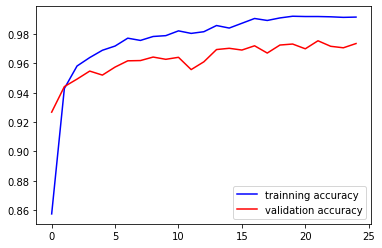

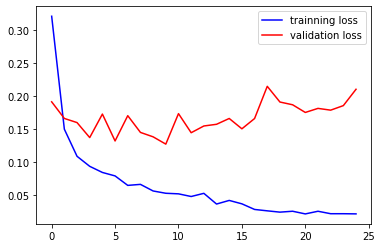

In [17]:
# visualization

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [18]:
# predict classes

prediction = model.predict_classes(X_test)
prediction = prediction.reshape(1, -1)[0]
prediction[:15]

C:\Users\chand\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
# correct and incorrect
# you can check tensorflow website

correct = np.nonzero(prediction == y_test)[0]
incorrect = np.nonzero(prediction != y_test)[0]

## some correct Visualize 

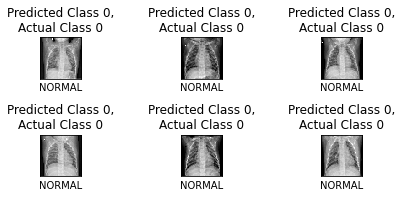

In [20]:
j = 0
for i in correct[:6]:
    plt.subplot(3,3,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(50,50), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},\nActual Class {}".format(prediction[i], y_test[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1

## Some incorrect visualization 

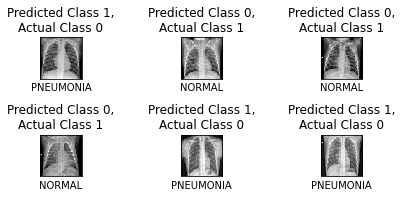

In [21]:
j = 0
for i in incorrect[:6]:
    plt.subplot(3,3,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(50,50), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},\nActual Class {}".format(prediction[i], y_test[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1

## Loading Saved Model

In [2]:
# load model and predict some some external photo
import tensorflow as tf
import cv2
from PIL import Image
import matplotlib.pyplot as plt
IMG_SIZE = 50
labels = ["NORMAL", "PNEUMONIA"]
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("model.h5") # load model

In [3]:
# extra pneumonia photo from google
prediction = model.predict([prepare("C:/Users/chand/Desktop/major project/17810_23812_bundle_archive/chest_xray/images/google image.jpg")])
print(labels[int(prediction[0])]) 

PNEUMONIA


In [4]:
# extra pneumonia photo from google
prediction = model.predict([prepare("C:/Users/chand/Desktop/major project/17810_23812_bundle_archive/chest_xray/images/person1_virus_7.jpeg")])
print(labels[int(prediction[0])])

PNEUMONIA


In [5]:
# extra pneumonia photo from google
prediction = model.predict([prepare("C:/Users/chand/Desktop/major project/17810_23812_bundle_archive/chest_xray/images/NORMAL2-IM-0350-0001.jpeg")])
print(labels[int(prediction[0])])

PNEUMONIA


In [6]:
# extra pneumonia photo from google
prediction = model.predict([prepare("C:/Users/chand/Desktop/major project/17810_23812_bundle_archive/chest_xray/test/NORMAL/NORMAL2-IM-0323-0001.jpeg")])
#plt.imshow(prediction[0].reshape(5,5), cmap="gray", interpolation='none')
print(labels[int(prediction[0])])

NORMAL


In [7]:
# extra pneumonia photo from google
prediction = model.predict([prepare("C:/Users/chand/Desktop/major project/17810_23812_bundle_archive/chest_xray/test/PNEUMONIA/person101_bacteria_486.jpeg")])
#plt.imshow(X_test[i].reshape(50,50), cmap="gray", interpolation='none')
print(labels[int(prediction[0])])

PNEUMONIA


In [8]:
# extra pneumonia photo from google
prediction = model.predict([prepare("C:/Users/chand/Desktop/major project/17810_23812_bundle_archive/chest_xray/images/download.jpg")])
#plt.imshow(X_test[i].reshape(50,50), cmap="gray", interpolation='none')
print(labels[int(prediction[0])])

PNEUMONIA


In [9]:
# extra pneumonia photo from google
prediction = model.predict([prepare("C:/Users/chand/Desktop/major project/17810_23812_bundle_archive/chest_xray/images/person154_bacteria_728.jpeg")])
#plt.imshow(X_test[i].reshape(50,50), cmap="gray", interpolation='none')
print(labels[int(prediction[0])])

PNEUMONIA


In [10]:
# extra pneumonia photo from google
prediction = model.predict([prepare("C:/Users/chand/Desktop/major project/17810_23812_bundle_archive/chest_xray/images/person119_bacteria_567.jpeg")])
#plt.imshow(X_test[i].reshape(50,50), cmap="gray", interpolation='none')
print(labels[int(prediction[0])])

PNEUMONIA


In [1]:
%%writefile templates/index.html

<html>
<head>
<meta name="viewport" content="width=device-width, initial-scale=1">
<style>
body{
       background-image: url("https://cdn.wallpapersafari.com/12/55/IRJb1c.jpg");
       background-repeat: no-repeat;
       background-attachment: fixed;
       background-size: 100% 100%;
     }
    
    h1{
        color:red;
    font-size: 45px;
    }
    
   .center {
            margin: auto;
            width: 70%;
            padding: 50px;
            position:absolute; 
            left:490px;
            top:145px;
            color:white;
           }
    h3{
        font-size: 30px;
        color: lightblue;
        display: block;
        margin-block-start: 1em;
        margin-block-end: 1em;
        margin-inline-start: 150px;
        margin-inline-end: 0px;
        font-weight: bold;
      }
    
    p{
        color:white;
        font-size:35px;
    }

</style>

</head>
   <body>
      <form action = "http://localhost:5000/uploader" method = "POST" enctype = "multipart/form-data">
        <center><h1> Pnemonia Detection Using Chest X-Ray Images </h1></center>
        <center><p> Upload X-Ray Image</p></center>
        <div class="center">
         <input type = "file" name = "file" />
         <input type = "submit" value="Predict"/>
         <br><br>
         <img src="{{url_for('static',filename = filen)}}" alt="Pneumonia X-Ray Image" width="455" height="265"/>
         <br><br>
         <h3>{{prediction}}</h3>
        </div>
      </form>
   </body>
</html>

Overwriting templates/index.html


In [2]:
%%writefile app.py

from flask import Flask, render_template, request, redirect, url_for
from werkzeug.utils import secure_filename
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from flask import Flask, render_template, request
import cv2
from PIL import Image
import matplotlib.pyplot as plt
app = Flask(__name__)
IMG_SIZE = 50
model = tf.keras.models.load_model("model.h5")
labels = ["NORMAL", "PNEUMONIA"]
app.config['UPLOAD_FOLDER'] = 'C:/Users/chand/Desktop/major project/Pneumonia Detection (Accuracy = 97%)/static/uploads/'

def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

@app.route('/upload')
def index():
    return render_template('index.html')

@app.route('/uploader', methods = ["GET","POST"])
def getimage():
    if request.method == "POST":
        file = request.files['file']
        file.save(os.path.join(app.config['UPLOAD_FOLDER'],secure_filename(file.filename)))
        filename = secure_filename(file.filename)
        filepath=""
        for root, dirs, files in os.walk(r"\Users\chand\Desktop\major project\17810_23812_bundle_archive"):
            for name in files:
                if name == filename:
                    filepath=os.path.abspath(os.path.join(root,filename))
        prediction = model.predict([prepare(filepath)])
        output = labels[int(prediction[0])]
        return render_template('index.html',filen="uploads/"+filename,prediction=output)

app.run(debug=True)

Overwriting app.py


In [ ]:
!python app.py